<a href="https://colab.research.google.com/github/cppel/dz/blob/main/Task7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Практическая работа №7. Использование автоэнкодера для решения задач семантической сегментации. Часть 1
Этап 1. Выбор и обработка исходных данных. Разделение на обучающую и тестовую выборку
Разделение данных по папкам на обучающую и проверочную выборку
Ниже представлен Код для разделения папки на train и val. После создания новых папок переименуйте их и расположите в формате, приведенном ниже, для использования для семантической сегментации с помощью генераторов данных.

Документация

In [ ]:
%pip install split-folders
%pip install patchify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
from PIL import Image
import cv2
from patchify import patchify
import numpy as np

In [ ]:
root_directory = r'/content/drive/MyDrive/Semantic segmentation dataset'
patch_size = 256

In [ ]:
image_dataset = []  
for path, subdirs, files in os.walk(root_directory):
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'images':   
        images = os.listdir(path)
        for i, image_name in enumerate(images):  
            if image_name.endswith(".jpg"):   
                image = cv2.imread(os.path.join(path, image_name), 1)  
                SIZE_X = (image.shape[1]//patch_size)*patch_size 
                SIZE_Y = (image.shape[0]//patch_size)*patch_size  
                image = image[0:SIZE_X, 0:SIZE_Y]
       
                patches_img = patchify(image, (patch_size, patch_size, 3), step=patch_size)
        
                for i in range(patches_img.shape[0]):
                    for j in range(patches_img.shape[1]):
                        
                        single_patch_img = patches_img[i,j,:,:]
                        single_patch_img = single_patch_img[0]

                        tile_name = path.split(os.path.sep)[-2].replace(' ', '_')                             
                        patch_filename =  os.path.splitext(image_name)[0] + f'_{tile_name}' + "_patch_" + str(i) + '_' + str(j) + ".jpg"
                        patch_path = os.path.join(root_directory, "Images", patch_filename)
                        cv2.imwrite(patch_path, single_patch_img)

In [ ]:
mask_dataset = []  
for path, subdirs, files in os.walk(root_directory):
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'masks': 
        masks = os.listdir(path) 
    
        for i, mask_name in enumerate(masks):  
            if mask_name.endswith(".png"):  
               
                mask = cv2.imread(os.path.join(path, mask_name), 1)
                SIZE_X = (mask.shape[1]//patch_size)*patch_size
                SIZE_Y = (mask.shape[0]//patch_size)*patch_size
                mask = mask[0:SIZE_X, 0:SIZE_Y]
                patches_mask = patchify(mask, (patch_size, patch_size, 3), step=patch_size)
        
                for i in range(patches_mask.shape[0]):
                    for j in range(patches_mask.shape[1]):
                        
                        single_patch_mask = patches_mask[i,j,:,:]
                        single_patch_mask = single_patch_mask[0]

                        tile_name = path.split(os.path.sep)[-2].replace(' ', '_')                             
                        patch_filename =  os.path.splitext(mask_name)[0] + f'_{tile_name}' + "_patch_" + str(i) + '_' + str(j) + ".png"
                        patch_path = os.path.join(root_directory, "Masks", patch_filename)
                        cv2.imwrite(patch_path, single_patch_mask)

In [ ]:
import splitfolders  # or import split_folders

input_folder = r'/content/drive/MyDrive/Semantic segmentation dataset/'
output_folder = r'/content/drive/MyDrive/task7_split'

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None) # default values

Copying files: 2106 files [06:13,  5.64 files/s]


In [ ]:
for root, dirs, files in os.walk('/content/drive/MyDrive/task7_1_dataset'):
    level = root.replace('/content/drive/MyDrive/task7_1_dataset', '').count(os.sep)
    indent = ' ' * 4 * (level)
    print('{}{}/'.format(indent, os.path.basename(root)))
    subindent = ' ' * 4 * (level + 1)
    if len(files) == 0:
        continue

    print('{}{} files'.format(subindent, len(files)))

task7_1_dataset/
    train_mask/
        train/
            789 files
    val_mask/
        val/
            264 files
    val_image/
        val/
            264 files
    train_image/
        train/
            789 files


In [ ]:
train_img_dir = r'/content/drive/MyDrive/task7_1_dataset/train_image/train'
train_mask_dir = r'/content/drive/MyDrive/task7_1_dataset/train_mask/train'

img_list = sorted(os.listdir(train_img_dir))
msk_list = sorted(os.listdir(train_mask_dir))

num_images = len(os.listdir(train_img_dir))

<Figure size 1200x800 with 0 Axes>

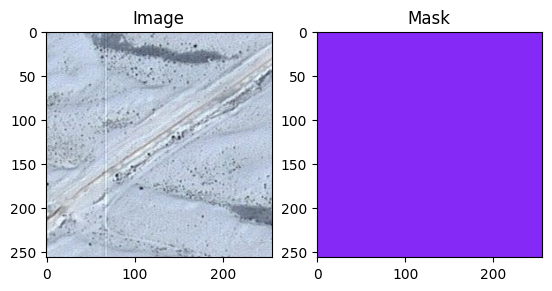

<Figure size 1200x800 with 0 Axes>

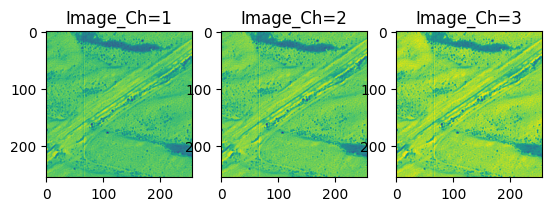

<Figure size 1200x800 with 0 Axes>

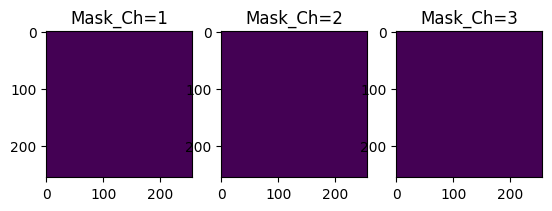

In [ ]:
import random
from matplotlib import pyplot as plt

img_num = random.randint(0, num_images-1)

img_for_plot = cv2.imread(os.path.join(train_img_dir, img_list[img_num]))
img_for_plot = cv2.cvtColor(img_for_plot, cv2.COLOR_BGR2RGB)

mask_for_plot =cv2.imread(os.path.join(train_mask_dir, msk_list[img_num]))
mask_for_plot = cv2.cvtColor(mask_for_plot, cv2.COLOR_BGR2RGB)

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
 
figure, axis = plt.subplots(1, 2)

axis[0].imshow(img_for_plot, cmap=plt.get_cmap('gray'),vmin=0,vmax=100)
axis[0].set_title('Image')

axis[1].imshow(mask_for_plot)
axis[1].set_title('Mask')

plt.show()

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
 
figure, axis = plt.subplots(1, 3)

axis[0].imshow(img_for_plot[:,:,0])
axis[0].set_title('Image_Ch=1')

axis[1].imshow(img_for_plot[:,:,1])
axis[1].set_title('Image_Ch=2')

axis[2].imshow(img_for_plot[:,:,2])
axis[2].set_title('Image_Ch=3')

# Combine all the operations and display
plt.show()

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
 
figure, axis = plt.subplots(1, 3)

axis[0].imshow(mask_for_plot[:,:,0])
axis[0].set_title("Mask_Ch=1")

axis[1].imshow(mask_for_plot[:,:,1])
axis[1].set_title("Mask_Ch=2")

axis[2].imshow(mask_for_plot[:,:,2])
axis[2].set_title("Mask_Ch=3")

plt.show()

Этап 2. Предобработка обучающей и валидационной выборки. Разработка архитектуры модели

In [ ]:
%pip install segmentation-models
%pip install opencv-python
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 7.1/7.1 MB 20.7 MB/s eta 0:00:00
     ------------------------------------- 298.0/298.0 kB 19.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import segmentation_models as sm
from keras.metrics import MeanIoU
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Segmentation Models: using `tf.keras` framework.


In [ ]:
Building = np.array((60, 16, 152))
Land = np.array((132, 41, 246))
Road = np.array((110, 193, 228))
Vegetation = np.array((254, 221, 58))
Water = np.array((226, 169, 41))
Unlabeled = np.array((155, 155, 155))

In [ ]:
def rgb_to_2D_label(label):
    if len(label.shape) == 3: 
        label = label[:,:,:3]
    if len(label.shape) == 4: 
        label = label[:,:,:,:3]

    label_seg = np.zeros(label.shape,dtype=np.uint8)
    label_seg [np.all(label == Building,axis=-1)] = 0
    label_seg [np.all(label==Land,axis=-1)] = 1
    label_seg [np.all(label==Road,axis=-1)] = 2
    label_seg [np.all(label==Vegetation,axis=-1)] = 3
    label_seg [np.all(label==Water,axis=-1)] = 4
    label_seg [np.all(label==Unlabeled,axis=-1)] = 5


    if len(label.shape) == 3: 
        label_seg = label_seg[:,:,0]
    if len(label.shape) == 4: 
        label_seg = label_seg[:,:,:,0]
        
    return label_seg

scaler = MinMaxScaler()
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

def preprocess_data(img, mask, num_class):
    img = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
    img = preprocess_input(img) 
    mask = rgb_to_2D_label(mask)
    mask = to_categorical(mask, num_class)
      
    return (img, mask)

In [ ]:
seed=24
batch_size= 16
n_classes=6

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
def trainGenerator(train_img_path, train_mask_path, num_class):
    
    img_data_gen_args = dict(horizontal_flip=True,
                      vertical_flip=True)
    
    image_datagen = ImageDataGenerator(**img_data_gen_args)
    mask_datagen = ImageDataGenerator(**img_data_gen_args)
    
    image_generator = image_datagen.flow_from_directory(
        train_img_path,
        class_mode = None,
        batch_size = batch_size,
        seed = seed)
    
    mask_generator = mask_datagen.flow_from_directory(
        train_mask_path,
        class_mode = None,
        batch_size = batch_size,
        seed = seed)
    
    train_generator = zip(image_generator, mask_generator)
    
    for (img, mask) in train_generator:
        img, mask = preprocess_data(img, mask, num_class)
        yield (img, mask)

In [ ]:
train_img_path = r'C:\Users\work\Downloads\task7_1_dataset\train_image'
train_mask_path = r'C:\Users\work\Downloads\task7_1_dataset\train_mask'
train_img_gen = trainGenerator(train_img_path, train_mask_path, num_class=6)

val_img_path = r'C:\Users\work\Downloads\task7_1_dataset\val_image'
val_mask_path = r'C:\Users\work\Downloads\task7_1_dataset\val_mask'
val_img_gen = trainGenerator(val_img_path, val_mask_path, num_class=6)

In [ ]:
num_train_imgs = len(os.listdir(r'C:\Users\work\Downloads\task7_1_dataset\train_image\train'))
num_val_images = len(os.listdir(r'C:\Users\work\Downloads\task7_1_dataset\val_image\val'))

steps_per_epoch = num_train_imgs//batch_size
val_steps_per_epoch = num_val_images//batch_size

Этап 3. Обучение модели
Изучите техническую докуентацию по работе с модулем Segmentation Models

Последовательно обучите несколько моделей, используя при этом разные функции потерь

Реализация всех имеющихся в модуле функций потерь на GIT разработчиков

При обучении используйте несколько метрик метрик, определив их в массиве.
Пример:

metrics = ['accuracy', sm.metrics.iou_score]

model.compile('Adam', loss=sm.losses.categorical_focal_jaccard_loss, metrics=metrics)
Реализация всех имеющихся в модуле метрик на GIT разработчиков

Модель 1
Функция потерь Сategorical Focal Jaccard Loss

In [ ]:
metrics = ['accuracy', sm.metrics.iou_score, sm.metrics.FScore()]
model_1 = sm.Unet(BACKBONE, encoder_weights='imagenet', classes=n_classes, activation='softmax')

model_1.compile(optimizer='adam', loss=sm.losses.categorical_focal_jaccard_loss, metrics=metrics)
model_1.summary()

85532672/85521592 [==============================] - 2s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 bn_data (BatchNormalization)   (None, None, None,   9           ['data[0][0]']                   
                                3)                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['bn_data[0][0]']                
                           

In [ ]:
history_1=model_1.fit(
          train_img_gen,
          steps_per_epoch=steps_per_epoch,
          epochs=100,
          verbose=1,
          validation_steps=val_steps_per_epoch,
          validation_data=val_img_gen)

Found 789 images belonging to 1 classes.
Found 789 images belonging to 1 classes.
Epoch 1/100
49/49 [==============================] - ETA: 0s - loss: 0.7670 - accuracy: 0.6522 - iou_score: 0.2651 - f1-score: 0.3660Found 264 images belonging to 1 classes.
Found 264 images belonging to 1 classes.
49/49 [==============================] - 40s 645ms/step - loss: 0.7670 - accuracy: 0.6522 - iou_score: 0.2651 - f1-score: 0.3660 - val_loss: 1.5621 - val_accuracy: 0.1198 - val_iou_score: 0.0220 - val_f1-score: 0.0396
Epoch 2/100
49/49 [==============================] - 23s 446ms/step - loss: 0.6212 - accuracy: 0.7624 - iou_score: 0.4119 - f1-score: 0.5226 - val_loss: 1.5595 - val_accuracy: 0.1195 - val_iou_score: 0.0318 - val_f1-score: 0.0482
Epoch 3/100
49/49 [==============================] - 22s 442ms/step - loss: 0.5507 - accuracy: 0.8033 - iou_score: 0.4805 - f1-score: 0.5927 - val_loss: 0.9650 - val_accuracy: 0.5248 - val_iou_score: 0.1041 - val_f1-score: 0.1503
Epoch 4/100
49/49 [======


Модель 2
Функция потерь Categorical CE Loss

In [ ]:
metrics = ['accuracy', sm.metrics.iou_score, sm.metrics.FScore()]
model_2 = sm.Unet(BACKBONE, encoder_weights='imagenet', classes=n_classes, activation='softmax')

model_2.compile(optimizer='adam', loss=sm.losses.CategoricalCELoss(), metrics=metrics)
model_2.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 bn_data (BatchNormalization)   (None, None, None,   9           ['data[0][0]']                   
                                3)                                                                
                                                                                                  
 zero_padding2d_34 (ZeroPadding  (None, None, None,   0          ['bn_data[0][0]']                
 2D)                            3)                                                          

In [ ]:
history_2=model_2.fit(
          train_img_gen,
          steps_per_epoch=steps_per_epoch,
          epochs=100,
          verbose=1,
          validation_steps=val_steps_per_epoch,
          validation_data=val_img_gen)

Epoch 1/100
49/49 [==============================] - 26s 461ms/step - loss: 0.1613 - accuracy: 0.6593 - iou_score: 0.2198 - f1-score: 0.3162 - val_loss: 2.3091 - val_accuracy: 0.1163 - val_iou_score: 0.0301 - val_f1-score: 0.0544
Epoch 2/100
49/49 [==============================] - 22s 449ms/step - loss: 0.1178 - accuracy: 0.7473 - iou_score: 0.3189 - f1-score: 0.4348 - val_loss: 0.8951 - val_accuracy: 0.4853 - val_iou_score: 0.0992 - val_f1-score: 0.1413
Epoch 3/100
49/49 [==============================] - 22s 457ms/step - loss: 0.1073 - accuracy: 0.7824 - iou_score: 0.3537 - f1-score: 0.4743 - val_loss: 0.2476 - val_accuracy: 0.5576 - val_iou_score: 0.1012 - val_f1-score: 0.1541
Epoch 4/100
49/49 [==============================] - 22s 451ms/step - loss: 0.0956 - accuracy: 0.8060 - iou_score: 0.3968 - f1-score: 0.5179 - val_loss: 0.3242 - val_accuracy: 0.5631 - val_iou_score: 0.1007 - val_f1-score: 0.1369
Epoch 5/100
49/49 [==============================] - 22s 450ms/step - loss: 0.09

Модель 3
Функция потерь Categorical Focal Dice Loss

In [ ]:
metrics = ['accuracy', sm.metrics.iou_score, sm.metrics.FScore()]
model_3 = sm.Unet(BACKBONE, encoder_weights='imagenet', classes=n_classes, activation='softmax')

model_3.compile(optimizer='adam', loss=sm.losses.categorical_focal_dice_loss, metrics=metrics)
model_3.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 bn_data (BatchNormalization)   (None, None, None,   9           ['data[0][0]']                   
                                3)                                                                
                                                                                                  
 zero_padding2d_68 (ZeroPadding  (None, None, None,   0          ['bn_data[0][0]']                
 2D)                            3)                                                          

In [ ]:
history_3=model_3.fit(
          train_img_gen,
          steps_per_epoch=steps_per_epoch,
          epochs=100,
          verbose=1,
          validation_steps=val_steps_per_epoch,
          validation_data=val_img_gen)

Epoch 1/100
49/49 [==============================] - 26s 456ms/step - loss: 0.5980 - accuracy: 0.6526 - iou_score: 0.3180 - f1-score: 0.4378 - val_loss: 1.3604 - val_accuracy: 0.1320 - val_iou_score: 0.0372 - val_f1-score: 0.0690
Epoch 2/100
49/49 [==============================] - 21s 436ms/step - loss: 0.4504 - accuracy: 0.7863 - iou_score: 0.4659 - f1-score: 0.5831 - val_loss: 1.3441 - val_accuracy: 0.1655 - val_iou_score: 0.0376 - val_f1-score: 0.0679
Epoch 3/100
49/49 [==============================] - 22s 445ms/step - loss: 0.4328 - accuracy: 0.8034 - iou_score: 0.4854 - f1-score: 0.6004 - val_loss: 1.5588 - val_accuracy: 0.0852 - val_iou_score: 0.0216 - val_f1-score: 0.0404
Epoch 4/100
49/49 [==============================] - 22s 446ms/step - loss: 0.4201 - accuracy: 0.8143 - iou_score: 0.5014 - f1-score: 0.6123 - val_loss: 1.0013 - val_accuracy: 0.2007 - val_iou_score: 0.0570 - val_f1-score: 0.0994
Epoch 5/100
49/49 [==============================] - 22s 442ms/step - loss: 0.39

In [ ]:
model_1.save(r'C:\Users\work\Downloads\models_task7\Model1.h5')
model_2.save(r'C:\Users\work\Downloads\models_task7\Model2.h5')
model_3.save(r'C:\Users\work\Downloads\models_task7\Model3.h5')

Этап 4. Визуализация процесса обучения. Оценка точности

In [ ]:
def display_training(history, name):
    fig, axs = plt.subplots(4, 1, sharex=True)
    
    fig.set_figwidth(15)
    fig.set_figheight(15)
    fig.suptitle(name)
    plt.xlabel('Epochs', fontsize=10)
    
    axs[0].set_title("Training and validation loss")
    axs[0].plot(history.history['loss'])
    axs[0].plot(history.history['val_loss'])
    axs[0].set_ylabel('Loss')
    axs[0].legend(['Training loss', 'Validation loss'], loc="upper right")

    axs[1].set_title("Training and validation accuracy")
    axs[1].plot(history.history['accuracy'])
    axs[1].plot(history.history['val_accuracy'])
    axs[1].set_ylabel('Accuracy')
    axs[1].legend(['Training accuracy', 'Validation accuracy'], loc="lower right")

    axs[2].set_title("Training and validation IOU score")
    axs[2].plot(history.history['iou_score'])
    axs[2].plot(history.history['val_iou_score'])
    axs[2].set_ylabel('IOU score')
    axs[2].legend(['Training IOU score', 'Validation IOU score'], loc="lower right")

    axs[3].set_title("Training and validation F1 score")
    axs[3].plot(history.history['f1-score'])
    axs[3].plot(history.history['val_f1-score'])
    axs[3].set_ylabel('F1 score')
    _  = axs[3].legend(['Training F1 score', 'Validation F1 score'], loc="lower right")

    fig.subplots_adjust(bottom=0.1, top=0.95)

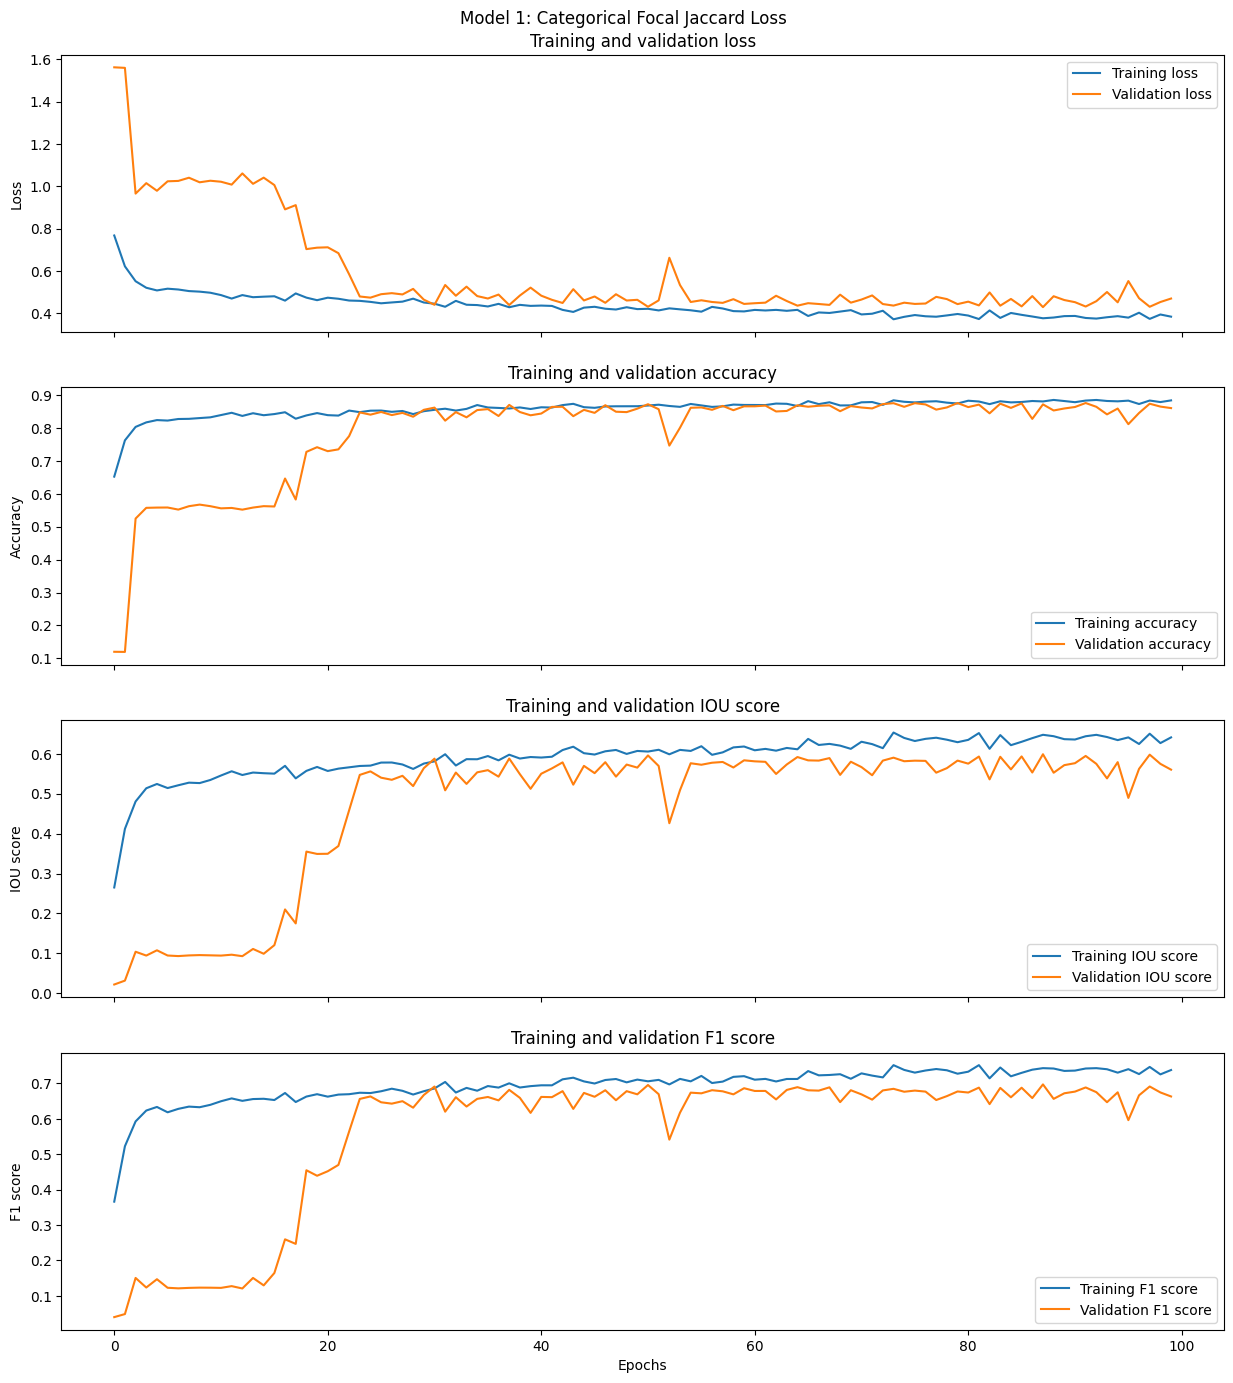

In [ ]:
# Визуализация обучения модели 1
display_training(history_1, 'Model 1: Сategorical Focal Jaccard Loss')

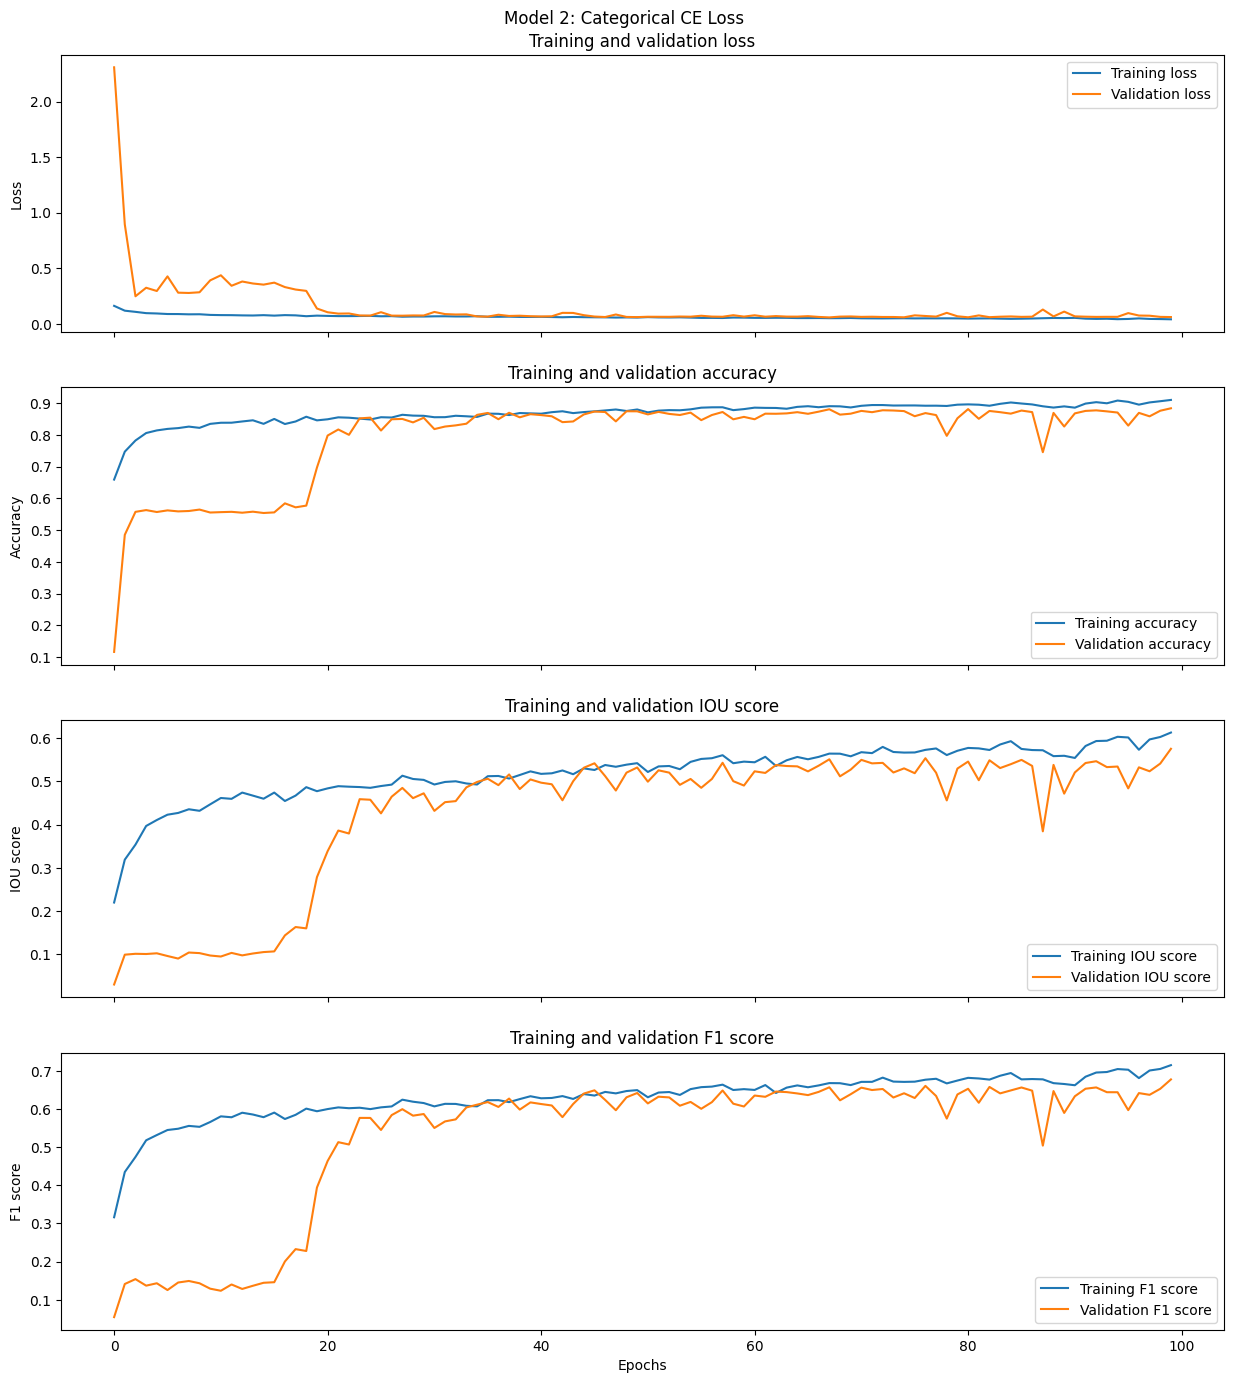

In [ ]:
# Визуализация обучения модели 2
display_training(history_2, 'Model 2: Categorical CE Loss')

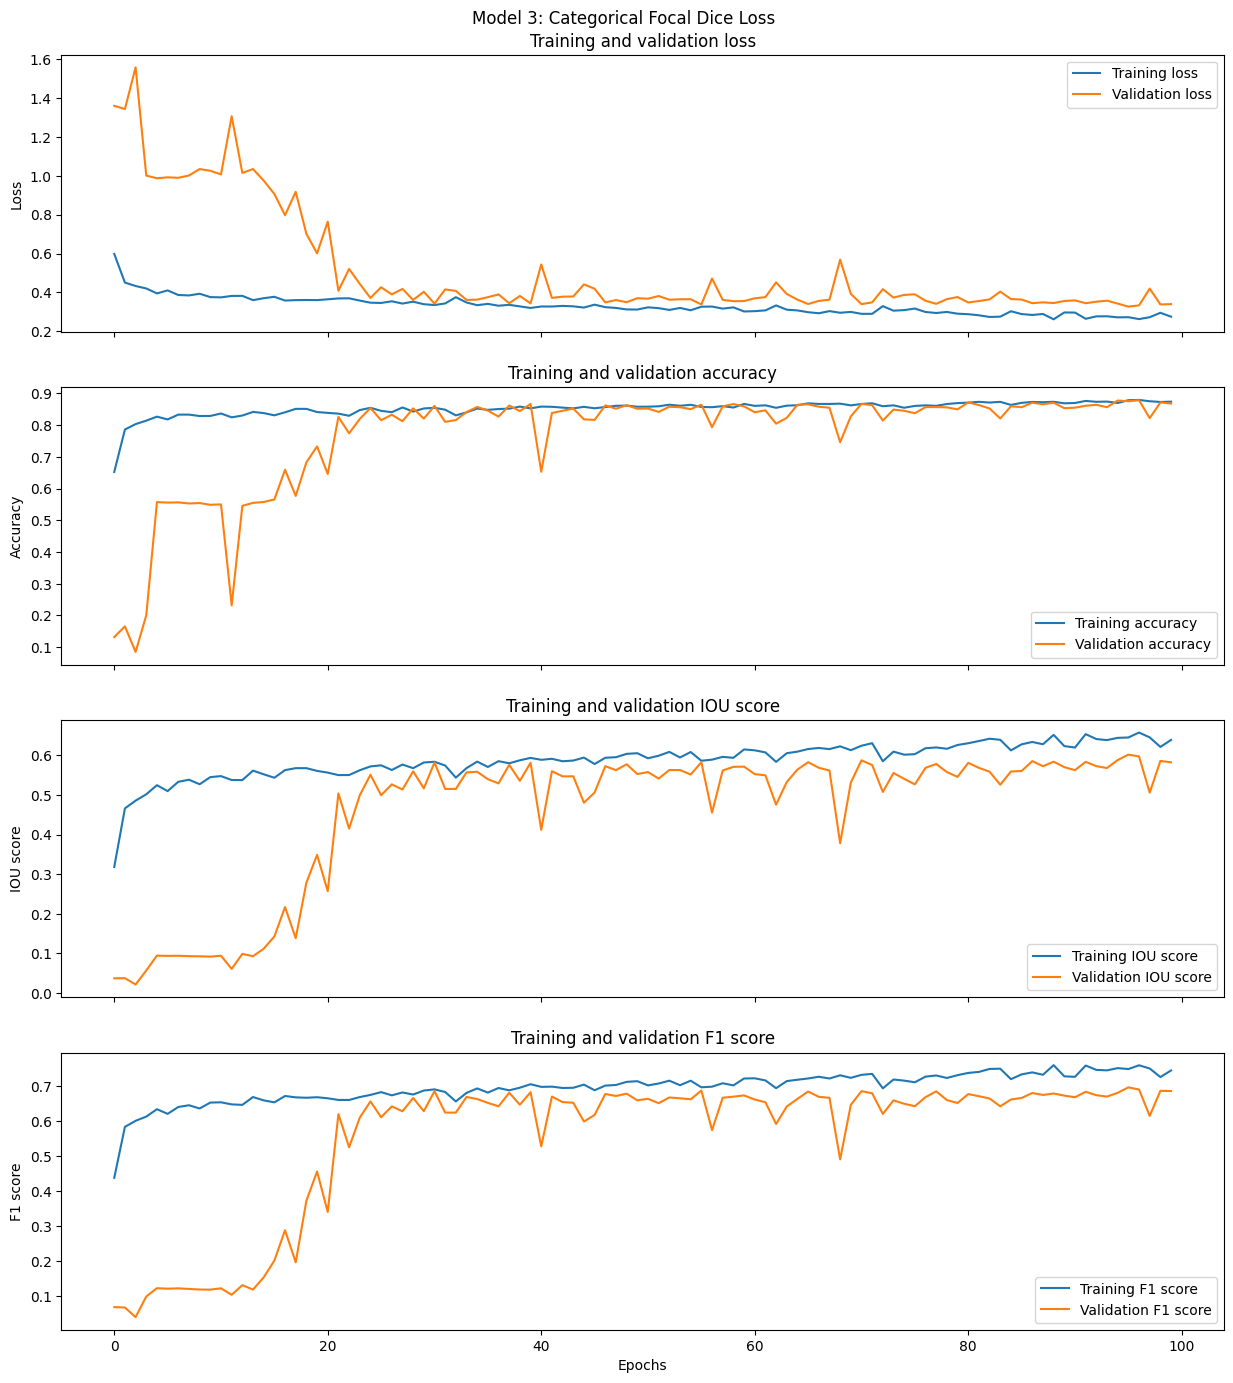

In [ ]:
# Визуализация обучения модели 3
display_training(history_3, 'Model 3: Categorical Focal Dice Loss')

In [ ]:
# Оценка моделей
from keras.models import load_model

metrics = ['accuracy', sm.metrics.iou_score, sm.metrics.FScore()]
model_1 = load_model(r'C:\Users\work\Downloads\models_task7\Model1.h5', compile=False)
model_1.compile(metrics=metrics)
test_pred_model_1 = model_1.evaluate(val_img_gen, steps=num_val_images)

model_2 = load_model(r'C:\Users\work\Downloads\models_task7\Model2.h5', compile=False)
model_2.compile(metrics=metrics)
test_pred_model_2 = model_2.evaluate(val_img_gen, steps=num_val_images)

model_3 = load_model(r'C:\Users\work\Downloads\models_task7\Model3.h5', compile=False)
model_3.compile(metrics=metrics)
test_pred_model_3 = model_3.evaluate(val_img_gen, steps=num_val_images)

264/264 [==============================] - 73s 272ms/step - loss: 0.0000e+00 - accuracy: 0.8693 - iou_score: 0.5838 - f1-score: 0.6840


In [ ]:
def print_model_evaluation(model_name, pred):
    print(f'Evaluation of {model_name}')
    print(F"Mean Accuracy = {pred[1]}") 
    print(F"Mean IOU = {pred[2]}") 
    print(F"Mean FScore = {pred[3]}") 
    print()


print_model_evaluation('Model 1: Сategorical Focal Jaccard Loss', test_pred_model_1)
print_model_evaluation('Model 2: Categorical CE Loss', test_pred_model_2)
print_model_evaluation('Model 3: Categorical Focal Dice Loss', test_pred_model_3)

Evaluation of Model 1: Сategorical Focal Jaccard Loss
Mean Accuracy = 0.8594644665718079
Mean IOU = 0.557929515838623
Mean FScore = 0.6597368121147156

Evaluation of Model 2: Categorical CE Loss
Mean Accuracy = 0.880964457988739
Mean IOU = 0.5623100996017456
Mean FScore = 0.667288601398468

Evaluation of Model 3: Categorical Focal Dice Loss
Mean Accuracy = 0.8692852854728699
Mean IOU = 0.5838384628295898
Mean FScore = 0.683971107006073



In [ ]:
# Отображение результатов

test_image_batch, test_mask_batch = val_img_gen.__next__()
test_mask_batch_argmax = np.argmax(test_mask_batch, axis=3) 

test_pred_batch_model_1 = model_1.predict(test_image_batch)
test_pred_batch_model_2 = model_2.predict(test_image_batch)
test_pred_batch_model_3 = model_3.predict(test_image_batch)

test_pred_batch_model_1_argmax = np.argmax(test_pred_batch_model_1, axis=3)
test_pred_batch_model_2_argmax = np.argmax(test_pred_batch_model_2, axis=3)
test_pred_batch_model_3_argmax = np.argmax(test_pred_batch_model_3, axis=3)

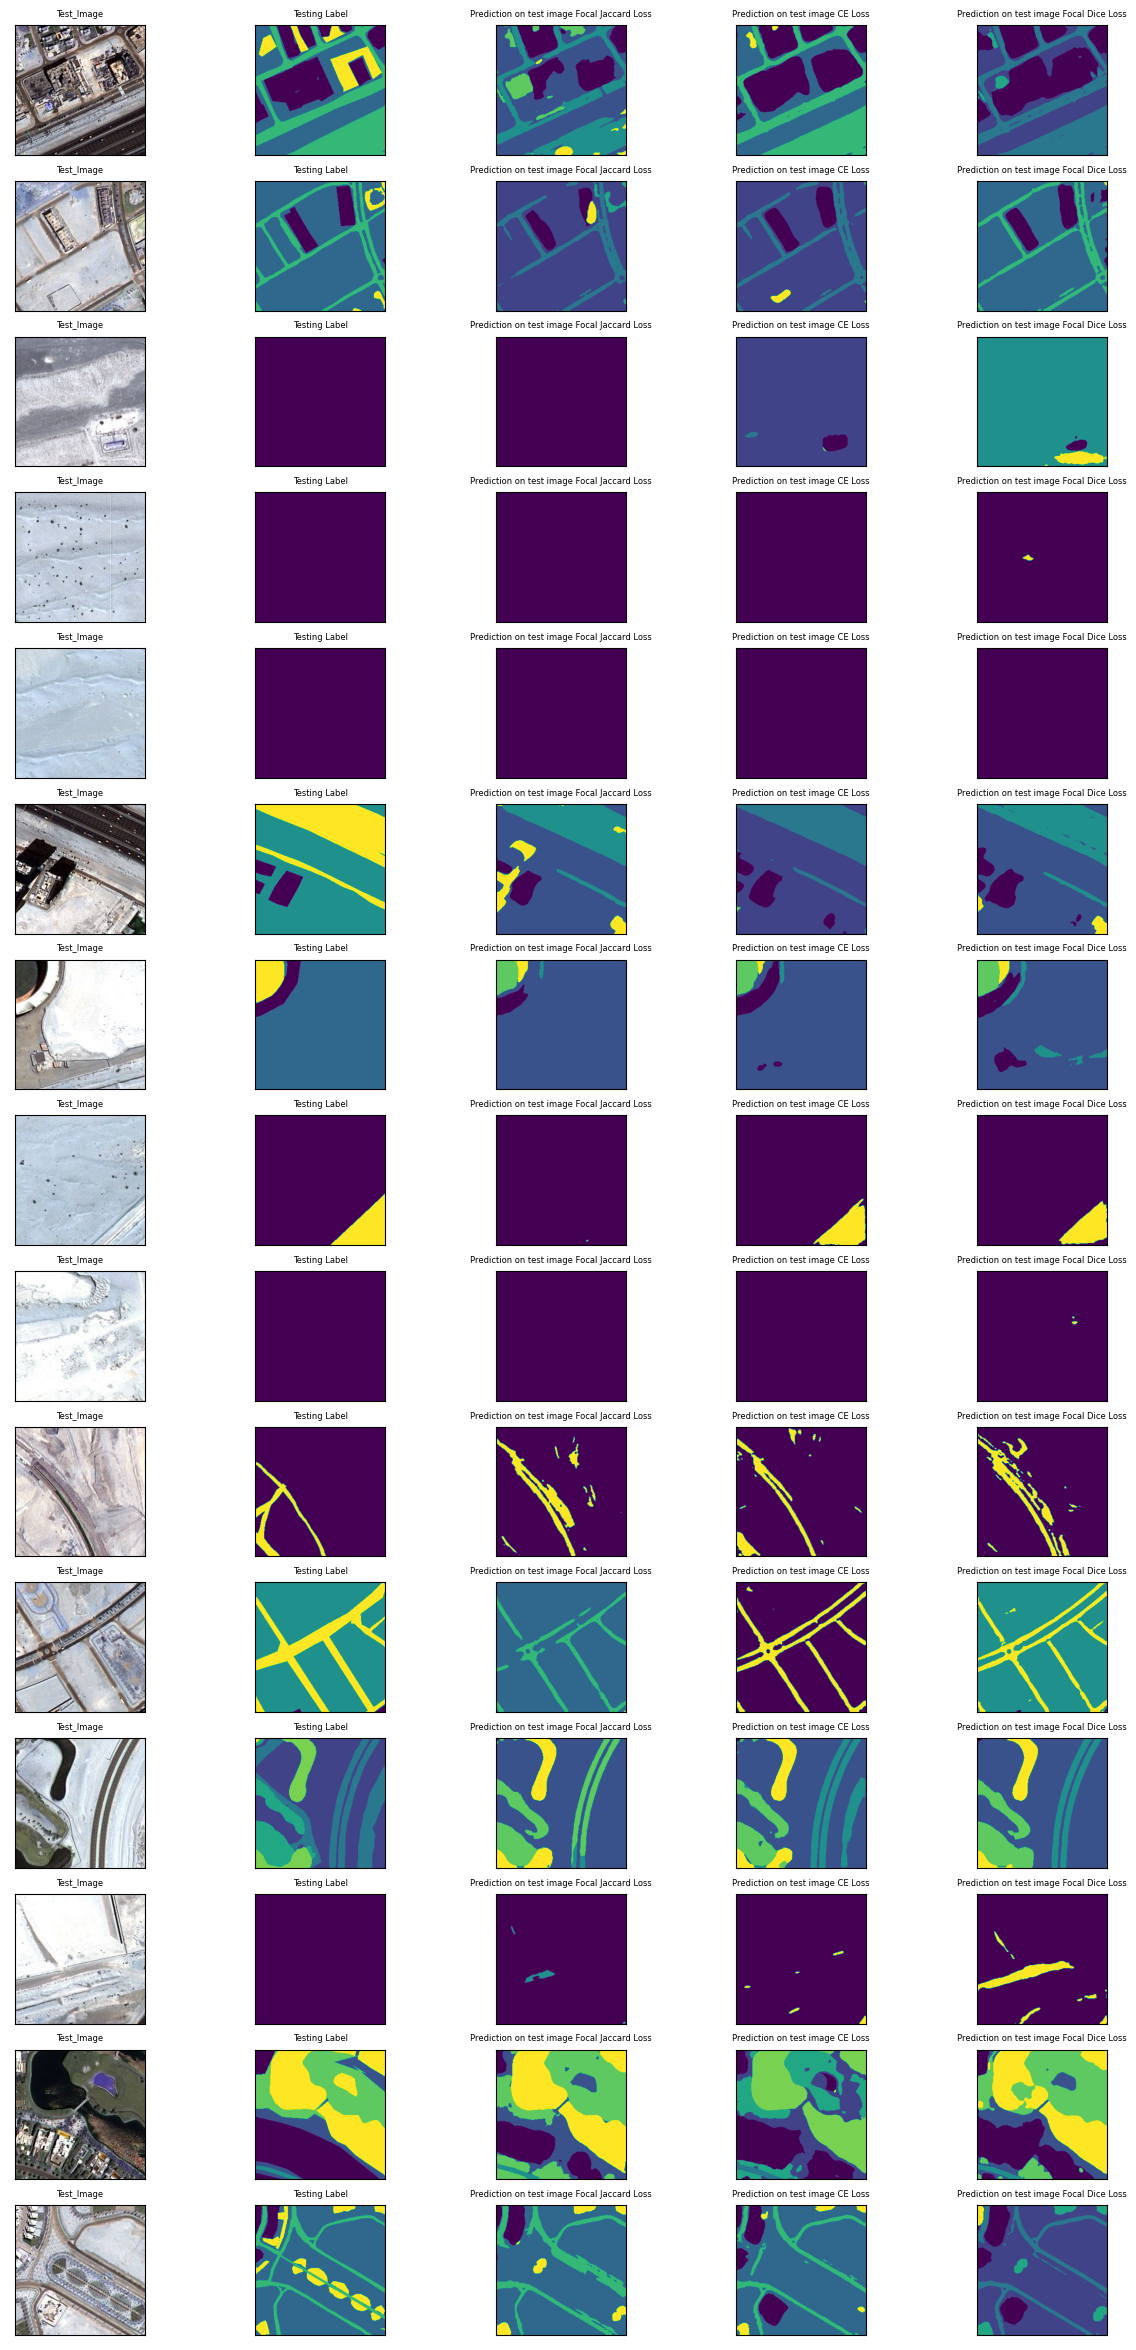

In [ ]:
fig, axis = plt.subplots(test_image_batch.shape[0]-1, 5)
fig.set_figwidth(15)
fig.set_figheight(30)

for img_num in range(test_image_batch.shape[0]-1):   
    
    axis[img_num][0].imshow(test_image_batch[img_num])
    axis[img_num][0].set_title('Test_Image', fontsize = 6)
    axis[img_num][0].axes.xaxis.set_visible(False)
    axis[img_num][0].axes.yaxis.set_visible(False)


    axis[img_num][1].imshow(test_mask_batch_argmax[img_num])
    axis[img_num][1].set_title("Testing Label", fontsize = 6)
    axis[img_num][1].axes.xaxis.set_visible(False)
    axis[img_num][1].axes.yaxis.set_visible(False)

    axis[img_num][2].imshow(test_pred_batch_model_1_argmax[img_num])
    axis[img_num][2].set_title("Prediction on test image Focal Jaccard Loss", fontsize = 6)
    axis[img_num][2].axes.xaxis.set_visible(False)
    axis[img_num][2].axes.yaxis.set_visible(False)

    axis[img_num][3].imshow(test_pred_batch_model_2_argmax[img_num])
    axis[img_num][3].set_title("Prediction on test image CE Loss", fontsize = 6)
    axis[img_num][3].axes.xaxis.set_visible(False)
    axis[img_num][3].axes.yaxis.set_visible(False)

    axis[img_num][4].imshow(test_pred_batch_model_3_argmax[img_num])
    axis[img_num][4].set_title("Prediction on test image Focal Dice Loss", fontsize = 6)
    axis[img_num][4].axes.xaxis.set_visible(False)
    axis[img_num][4].axes.yaxis.set_visible(False)
    
plt.show()